In [44]:
import pandas as pd
import requests
import json
import logging
import numpy as np

In [14]:


# Configure logging
logging.basicConfig(filename='Question_6_log.txt', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Requesting content from the URL with GET method
response = requests.get('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data
    json_data = response.json()

    # Save the JSON data to a file
    with open('json_data.json', 'w') as json_file:
        json.dump(json_data, json_file)
    logging.info("JSON data has been saved successfully.")
else:
    logging.error("Error occurred while requesting the data.")

# Load JSON data
with open('json_data.json') as json_file:
    data = json.load(json_file)

# Extracting relevant attributes and storing in a list of dictionaries
records = []
for pokemon in data['pokemon']:
    record = {
        'id': pokemon['id'],
        'num': pokemon['num'],
        'name': pokemon['name'],
        'img': pokemon['img'],
        'type': ', '.join(pokemon['type']),
        'height': pokemon['height'],
        'weight': pokemon['weight'],
        'candy': pokemon['candy'],
        'candy_count': pokemon.get('candy_count', None),
        'egg': pokemon.get('egg', None),
        'spawn_chance': pokemon.get('spawn_chance', None),
        'avg_spawns': pokemon.get('avg_spawns', None),
        'spawn_time': pokemon.get('spawn_time', None),
        'multipliers': ', '.join(str(multiplier) for multiplier in pokemon.get('multipliers') or []),
        'weakness': ', '.join(pokemon['weaknesses']),
        'next_evolution': ', '.join([evolution['name'] for evolution in pokemon.get('next_evolution') or []]),
        'prev_evolution': ', '.join([evolution['name'] for evolution in pokemon.get('prev_evolution') or []])
    }
    records.append(record)

# Create a DataFrame from the records
structured_dataset = pd.DataFrame(records)

# Save the DataFrame as an Excel file
structured_dataset.to_excel('structured_dataset.xlsx', index=False)
logging.info("Structured dataset has been saved as structured_dataset.xlsx.")


In [24]:
df=structured_dataset.drop(['id','img'],axis=1)

In [25]:
df.head()

,num,name,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,001,Bulbasaur,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",
1,002,Ivysaur,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,003,Venusaur,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,,"Fire, Ice, Flying, Psychic",,"Bulbasaur, Ivysaur"
3,004,Charmander,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock","Charmeleon, Charizard",
4,005,Charmeleon,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock",Charizard,Charmander


In [35]:
df.isna().sum()

num                0
name               0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         0
multipliers        0
weakness           0
next_evolution     0
prev_evolution     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num             151 non-null    object 
 1   name            151 non-null    object 
 2   type            151 non-null    object 
 3   height          151 non-null    object 
 4   weight          151 non-null    object 
 5   candy           151 non-null    object 
 6   candy_count     70 non-null     float64
 7   egg             151 non-null    object 
 8   spawn_chance    151 non-null    float64
 9   avg_spawns      151 non-null    float64
 10  spawn_time      151 non-null    object 
 11  multipliers     151 non-null    object 
 12  weakness        151 non-null    object 
 13  next_evolution  151 non-null    object 
 14  prev_evolution  151 non-null    object 
dtypes: float64(3), object(12)
memory usage: 17.8+ KB


all Pokemons whose spawn rate is less than 5%
65


<Axes: xlabel='name'>

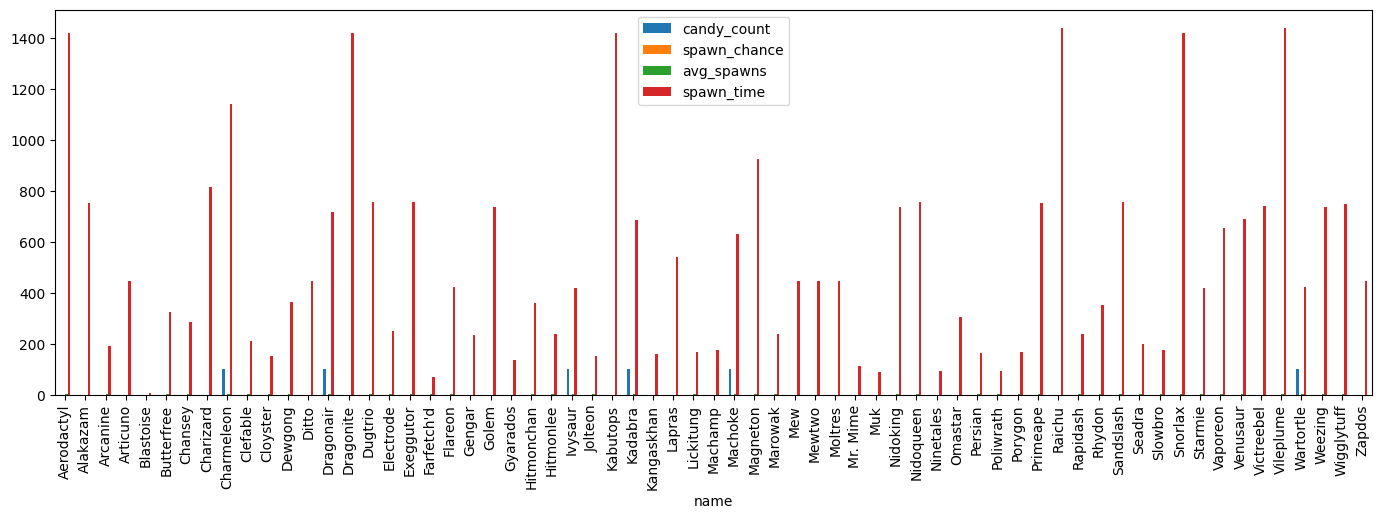

In [88]:
# Question 1: Get all Pokemons whose spawn rate is less than 5%
print('all Pokemons whose spawn rate is less than 5%')
print(len(df[df['spawn_chance']<0.05]))

df[df['spawn_chance']<0.05].groupby('name').sum().plot(kind='bar',figsize=(17,5))

all Pokemons that have less than 4 weaknesses
102


<Axes: xlabel='name'>

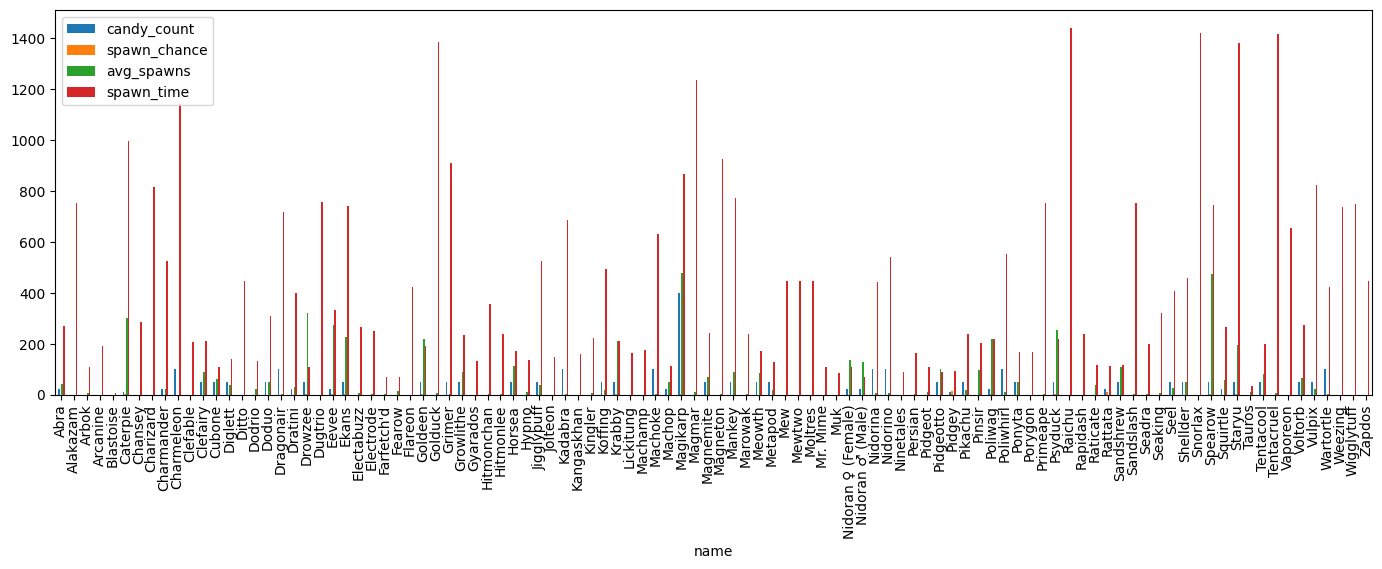

In [89]:
# Question 2: Get all Pokemons that have less than 4 weaknesses
print('all Pokemons that have less than 4 weaknesses')
print(len(df[df['weakness'].str.count(',')<=2]))

df[df['weakness'].str.count(',')<=2].groupby('name').sum().plot(kind='bar',figsize=(17,5))

all Pokemons that have no multipliers at all
81


<Axes: xlabel='name'>

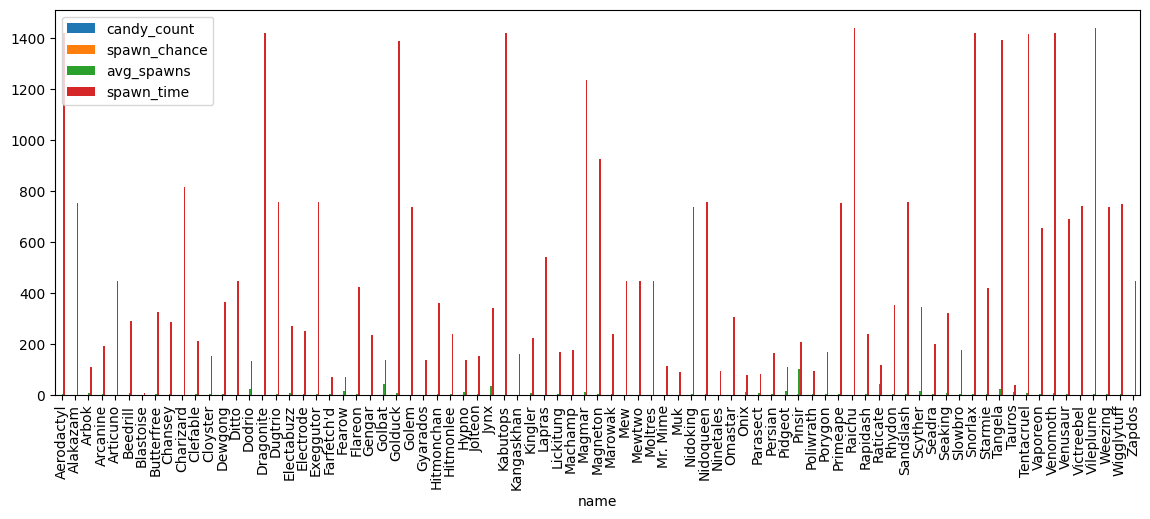

In [83]:
# Question 3: Get all Pokemons that have no multipliers at all
print('all Pokemons that have no multipliers at all')

print(len(df[df['multipliers']=='']))
df[df['multipliers']==''].groupby('name').sum().plot(kind='bar',figsize=(14,5))

all Pokemons that do not have more than 2 evolutions
150


<Axes: xlabel='name'>

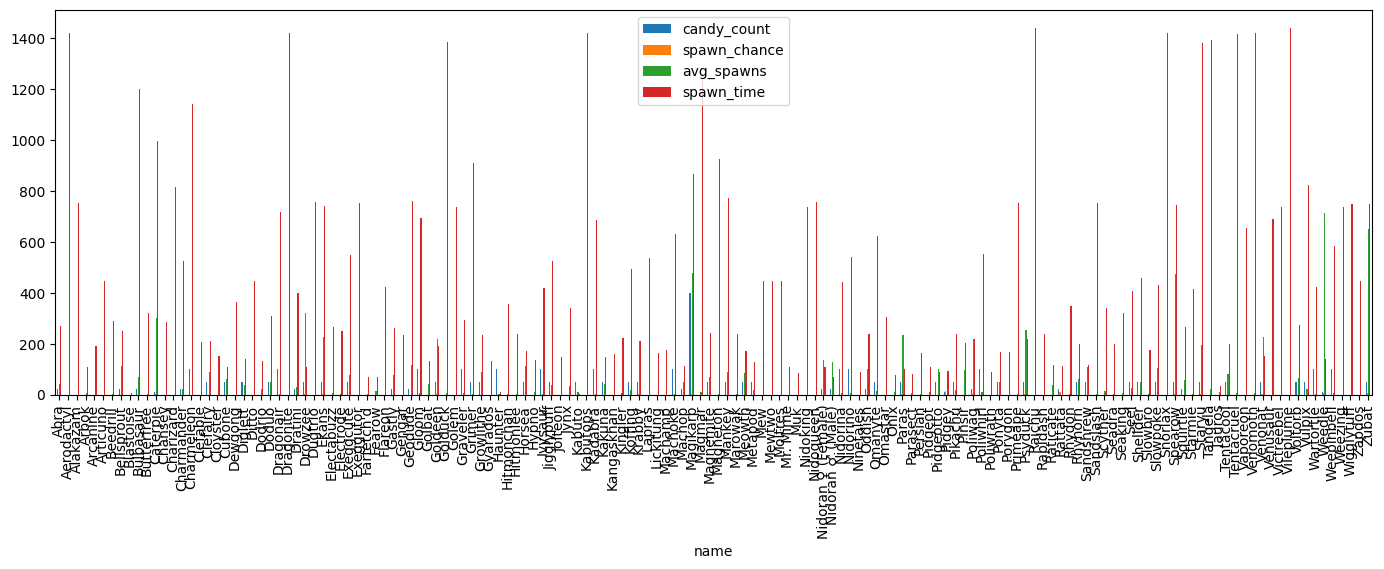

In [85]:
# Question 4: Get all Pokemons that do not have more than 2 evolutions
print('all Pokemons that do not have more than 2 evolutions')
print(len(df[structured_dataset['next_evolution'].str.count(',')<2]))
df[structured_dataset['next_evolution'].str.count(',')<2].groupby('name').sum().plot(kind='bar',figsize=(17,5))

In [69]:
#converting time into seconds
df['spawn_time']=df['spawn_time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]) 
                        if x!='N/A' else np.nan
                        ).fillna(447.78620689655173)


all Pokemons whose spawn time is less than 300 seconds
75


<Axes: xlabel='name'>

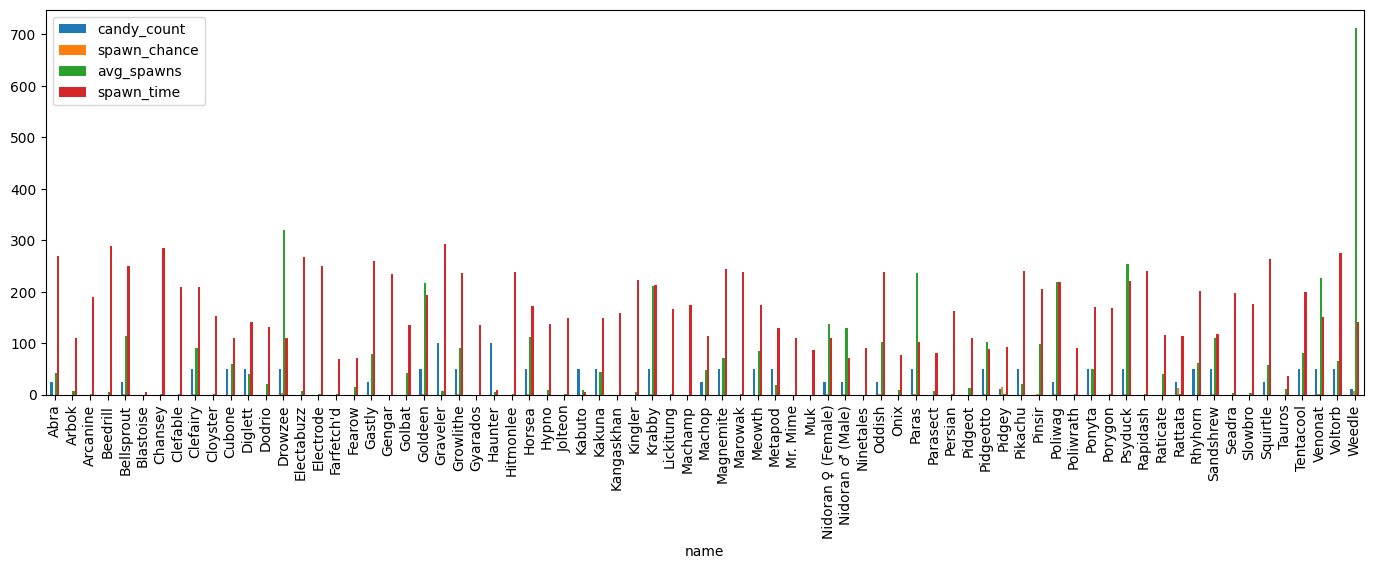

In [87]:
# Question 5: Get all Pokemons whose spawn time is less than 300 seconds
print('all Pokemons whose spawn time is less than 300 seconds')
print(len(df[df['spawn_time']<300]))
df[df['spawn_time']<300].groupby('name').sum().plot(kind='bar',figsize=(17,5))

In [91]:
# Question 6: Get all Pokemon who have more than two types of capabilities
print('Pokemon who have more than two types of capabilities')
pokemon_more_types = df[df['type'].str.count(',') > 1]
len(pokemon_more_types)


Pokemon who have more than two types of capabilities


0